# ATSSB_Prob56_GDP_ModelComparison

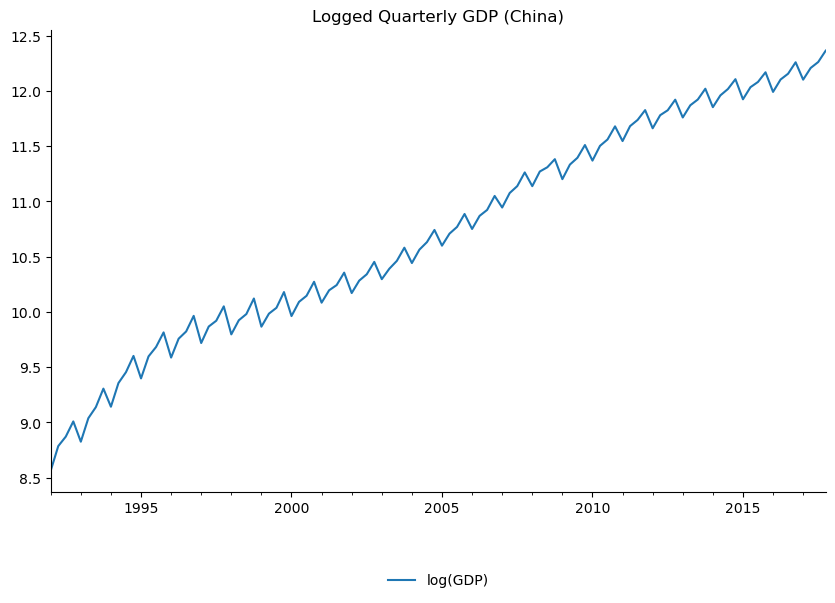


===== SARIMA(2,1,0)(0,1,0)_4 =====
                                     SARIMAX Results                                     
Dep. Variable:                               GDP   No. Observations:                  104
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 4)   Log Likelihood                 273.781
Date:                           Thu, 19 Feb 2026   AIC                           -541.561
Time:                                   09:22:48   BIC                           -533.776
Sample:                               03-31-1992   HQIC                          -538.411
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5133      0.075      6.822      0.000       0.366       0.661
ar.L2  

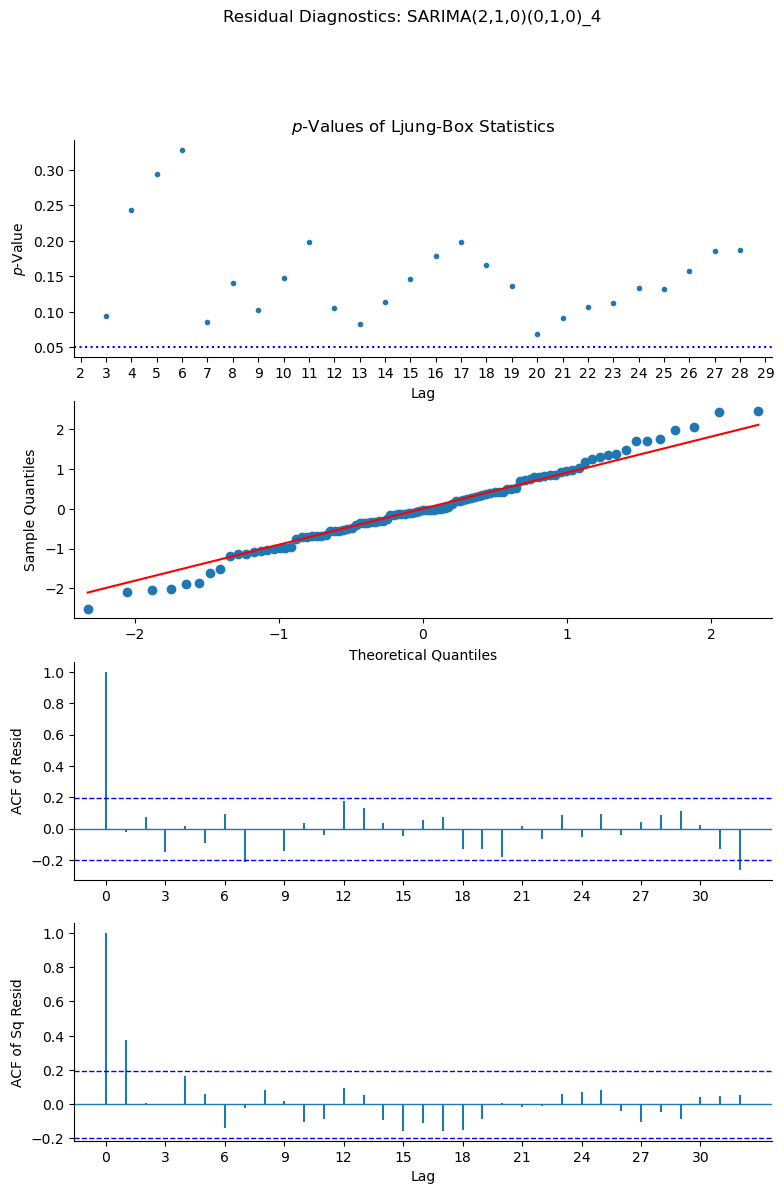


===== SARIMA(1,1,1)(0,1,0)_4 =====
                                     SARIMAX Results                                      
Dep. Variable:                                GDP   No. Observations:                  104
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                 273.703
Date:                            Thu, 19 Feb 2026   AIC                           -541.405
Time:                                    09:22:48   BIC                           -533.620
Sample:                                03-31-1992   HQIC                          -538.255
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4342      0.189      2.302      0.021       0.064       0.804

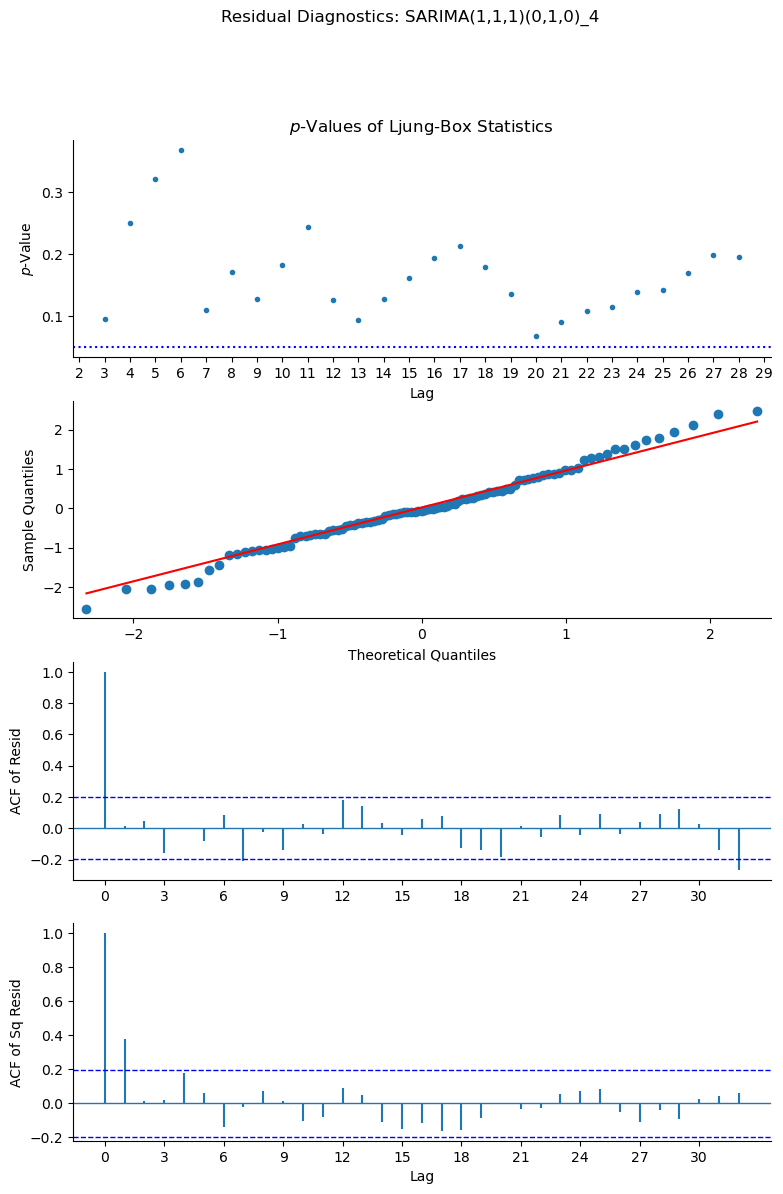


===== MODEL COMPARISON =====
Model (2,1,0)x(0,1,0)_4  AIC: -541.5612841343858
Model (1,1,1)x(0,1,0)_4  AIC: -541.4054448745801
Model (2,1,0)x(0,1,0)_4  BIC: -533.775924583982
Model (1,1,1)x(0,1,0)_4  BIC: -533.6200853241763
Model (2,1,0)x(0,1,0)_4  HQIC: -538.4113151052136
Model (1,1,1)x(0,1,0)_4  HQIC: -538.2554758454078

Production build completed successfully.


In [4]:
# ==========================================================
# ATSSB – Problem 5.6
# SARIMA(2,1,0)(0,1,0)_4  vs  SARIMA(1,1,1)(0,1,0)_4
# Logged GDP China
# ==========================================================

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from PythonTsa.ModResidDiag import plot_ResidDiag
from PythonTsa.datadir import getdtapath

# ==========================================================
# GLOBAL PLOT SETTINGS (BOOK STYLE)
# ==========================================================

plt.rcParams.update({
    "figure.figsize": (10,6),
    "figure.facecolor": "none",
    "axes.facecolor": "none",
    "savefig.transparent": True,
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "legend.frameon": False
})

# ==========================================================
# OUTPUT FOLDER
# ==========================================================

FIG_DIR = Path("Prob56_figs")
FIG_DIR.mkdir(exist_ok=True)

# ==========================================================
# LOAD DATA (exact book dataset)
# ==========================================================

dtapath = getdtapath()

x = pd.read_csv(
    dtapath + "gdpquarterlychina1992.1-2017.4.csv",
    header=0
)

dates = pd.date_range(start="1992", periods=len(x), freq="QE")
x.index = dates
x = pd.Series(x["GDP"])

lx = np.log(x)

# ==========================================================
# 1️⃣  TIME SERIES PLOT (logged series)
# ==========================================================

fig, ax = plt.subplots()

lx.plot(ax=ax, label="log(GDP)")

ax.legend(loc="upper center",
          bbox_to_anchor=(0.5, -0.15),
          ncol=1)

ax.set_title("Logged Quarterly GDP (China)")
ax.set_xlabel("")
ax.set_ylabel("")

fig.savefig(FIG_DIR / "series.png",
            dpi=300,
            transparent=True,
            bbox_inches="tight")

fig.savefig(FIG_DIR / "series.pdf",
            transparent=True,
            bbox_inches="tight")

plt.show()

# ==========================================================
# 2️⃣  SARIMA(2,1,0)(0,1,0)_4
# ==========================================================

model1 = sm.tsa.SARIMAX(
    lx,
    order=(2,1,0),
    seasonal_order=(0,1,0,4),
    trend="n"
).fit(disp=False)

print("\n===== SARIMA(2,1,0)(0,1,0)_4 =====")
print(model1.summary())

# Drop initial differencing residuals (1+4 = 5)
resid1 = model1.resid[5:]

plot_ResidDiag(resid1,
               noestimatedcoef=2,
               nolags=28,
               lag=32)

plt.suptitle("Residual Diagnostics: SARIMA(2,1,0)(0,1,0)_4")

fig = plt.gcf()

fig.savefig(FIG_DIR / "sarima20_diagnostics.png",
            dpi=300,
            transparent=True,
            bbox_inches="tight")

fig.savefig(FIG_DIR / "sarima20_diagnostics.pdf",
            transparent=True,
            bbox_inches="tight")

plt.show()

# ==========================================================
# 3️⃣  SARIMA(1,1,1)(0,1,0)_4
# ==========================================================

model2 = sm.tsa.SARIMAX(
    lx,
    order=(1,1,1),
    seasonal_order=(0,1,0,4),
    trend="n"
).fit(disp=False)

print("\n===== SARIMA(1,1,1)(0,1,0)_4 =====")
print(model2.summary())

resid2 = model2.resid[5:]

plot_ResidDiag(resid2,
               noestimatedcoef=2,
               nolags=28,
               lag=32)

plt.suptitle("Residual Diagnostics: SARIMA(1,1,1)(0,1,0)_4")

fig = plt.gcf()

fig.savefig(FIG_DIR / "sarima11_diagnostics.png",
            dpi=300,
            transparent=True,
            bbox_inches="tight")

fig.savefig(FIG_DIR / "sarima11_diagnostics.pdf",
            transparent=True,
            bbox_inches="tight")

plt.show()

# ==========================================================
# 4️⃣  INFORMATION CRITERIA COMPARISON
# ==========================================================

print("\n===== MODEL COMPARISON =====")
print("Model (2,1,0)x(0,1,0)_4  AIC:", model1.aic)
print("Model (1,1,1)x(0,1,0)_4  AIC:", model2.aic)
print("Model (2,1,0)x(0,1,0)_4  BIC:", model1.bic)
print("Model (1,1,1)x(0,1,0)_4  BIC:", model2.bic)
print("Model (2,1,0)x(0,1,0)_4  HQIC:", model1.hqic)
print("Model (1,1,1)x(0,1,0)_4  HQIC:", model2.hqic)

print("\nProduction build completed successfully.")
